We will first import pandas and then open up the csv to have a first look at the data.

In [16]:
import pandas as pd

In [19]:
df = pd.read_csv("sf_business_dataset.csv", encoding='latin-1') #encoding to mitigate the utf-8 codec issue

In [21]:
#First 10 rows
df.head(10)

,Location Id,Business Account Number,Ownership Name,DBA Name,Street Address,City,State,Source Zipcode,Business Start Date,Business End Date,...,NAICS Code,NAICS Code Description,Parking Tax,Transient Occupancy Tax,LIC Code,LIC Code Description,Supervisor District,Neighborhoods - Analysis Boundaries,Business Corridor,Business Location
0,0026883-11-001,26883,Chevron Texaco Corp,Chevron,2998 San Jose Av,San Francisco,CA,94112.0,10/1/1968,NaN,...,NaN,NaN,False,False,NaN,NaN,11.0,Oceanview/Merced/Ingleside,NaN,"2998 SAN JOSE AV\rSan Francisco, CA 94112\r(37..."
1,0026883-12-001,26883,Chevron Texaco Corp,Chevron,301 Claremont Blvd,San Francisco,CA,94127.0,10/1/1968,NaN,...,NaN,NaN,False,False,NaN,NaN,7.0,West of Twin Peaks,NaN,"301 CLAREMONT BLVD\rSan Francisco, CA 94127\r(..."
2,0026883-13-001,26883,Chevron Texaco Corp,Chevron,3675 Geary Blvd,San Francisco,CA,94118.0,10/1/1968,NaN,...,NaN,NaN,False,False,NaN,NaN,1.0,Lone Mountain/USF,NaN,"3675 GEARY BLVD\rSan Francisco, CA 94118\r(37...."
3,0026883-15-001,26883,Chevron Texaco Corp,Chevron,2301 Lombard St,San Francisco,CA,94123.0,10/1/1968,NaN,...,NaN,NaN,False,False,NaN,NaN,2.0,Marina,NaN,"2301 LOMBARD ST\rSan Francisco, CA 94123\r(37...."
4,0026883-16-001,26883,Chevron Texaco Corp,Chevron,1288 19th St,San Francisco,CA,94107.0,10/1/1968,NaN,...,NaN,NaN,False,False,NaN,NaN,10.0,Potrero Hill,NaN,"1288 19TH ST\rSan Francisco, CA 94107\r(37.761..."
5,0026883-17-001,26883,Chevron Texaco Corp,Chevron,1000 Harrison St,San Francisco,CA,94107.0,10/1/1968,NaN,...,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,"1000 HARRISON ST\rSan Francisco, CA 94107\r(37..."
6,0026883-19-001,26883,Chevron Texaco Corp,Chevron,1198 Valencia St,San Francisco,CA,94110.0,10/1/1968,NaN,...,NaN,NaN,False,False,NaN,NaN,8.0,Mission,NaN,"1198 VALENCIA ST\rSan Francisco, CA 94110\r(37..."
7,0026883-20-001,26883,Chevron Texaco Corp,Chevron,1100 Junipero Serra Blvd,San Francisco,CA,94132.0,10/1/1968,NaN,...,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,"1100 JUNIPERO SERRA BLVD\rSan Francisco, CA 94..."
8,0026883-21-001,26883,Chevron Texaco Corp,Chevron,2500 California St,San Francisco,CA,94115.0,10/1/1968,NaN,...,NaN,NaN,False,False,NaN,NaN,2.0,Pacific Heights,NaN,"2500 CALIFORNIA ST\rSan Francisco, CA 94115\r(..."
9,0026883-26-001,26883,Chevron Texaco Corp,Chevron Corporation,345 California St,San Francisco,CA,94104.0,10/1/1968,NaN,...,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,"345 CALIFORNIA ST\rSan Francisco, CA 94104\r(3..."


In [22]:
#The number of rows this data set has
df.shape

(216649, 26)

#### That's a pretty massive dataset. With each row representing a single business (might not be unique), it makes sense to see if this dataframe or df has any missing rows and if we need to remove them or replace them. 

In [23]:
df.isnull().sum()

Location Id                                 0
Business Account Number                     0
Ownership Name                              0
DBA Name                                    0
Street Address                              4
City                                      269
State                                     680
Source Zipcode                             97
Business Start Date                         0
Business End Date                      172670
Location Start Date                         0
Location End Date                      156405
Mail Address                                2
Mail City                                  52
Mail Zipcode                              130
Mail State                                119
NAICS Code                              87716
NAICS Code Description                  90199
Parking Tax                                 0
Transient Occupancy Tax                     0
LIC Code                               206758
LIC Code Description              

#### The Highest missing rows occur in Business end date and that is obvious because most of the businesses are still active and hence do not have an end date. Also considering the fact that not all businesses need to be in a business corridor, we might need to have a look at the massive number of NaNs in the business corridor column. 

#### We are more interested in the DBA name column rather than the business owner. The reasons for this being, a business owner can have multiple different businesses. However we are concerned with places in San Francisco with a high concentration of active businesses. Very much possible that a business owner has businesses in multiple categories at different locations. Unless a overview is required, the ownership name is irrelevant currently. To maintain the original dataframe we will keep a copy of it, to be referenced later and need be and drop columns from the current one only. 

In [24]:
df_copy = df.copy()

#### Firstly we will pinpoint businesses which are no longer active. We are interested in the ones that are active. And that is simple enough. We will just select the ones with NaNs in the business end date colun, because they are still active.

In [47]:
active_df = df[df['Business End Date'].isnull()]

In [48]:
active_df.shape

(172670, 26)

#### This active_df is our df of interest now as it contains only the active businesses. 

In [40]:
active_df.head(5)

,Location Id,Business Account Number,Ownership Name,DBA Name,Street Address,City,State,Source Zipcode,Business Start Date,Business End Date,...,NAICS Code,NAICS Code Description,Parking Tax,Transient Occupancy Tax,LIC Code,LIC Code Description,Supervisor District,Neighborhoods - Analysis Boundaries,Business Corridor,Business Location
0,0026883-11-001,26883,Chevron Texaco Corp,Chevron,2998 San Jose Av,San Francisco,CA,94112.0,10/1/1968,NaN,...,NaN,NaN,False,False,NaN,NaN,11.0,Oceanview/Merced/Ingleside,NaN,"2998 SAN JOSE AV\rSan Francisco, CA 94112\r(37..."
1,0026883-12-001,26883,Chevron Texaco Corp,Chevron,301 Claremont Blvd,San Francisco,CA,94127.0,10/1/1968,NaN,...,NaN,NaN,False,False,NaN,NaN,7.0,West of Twin Peaks,NaN,"301 CLAREMONT BLVD\rSan Francisco, CA 94127\r(..."
2,0026883-13-001,26883,Chevron Texaco Corp,Chevron,3675 Geary Blvd,San Francisco,CA,94118.0,10/1/1968,NaN,...,NaN,NaN,False,False,NaN,NaN,1.0,Lone Mountain/USF,NaN,"3675 GEARY BLVD\rSan Francisco, CA 94118\r(37...."
3,0026883-15-001,26883,Chevron Texaco Corp,Chevron,2301 Lombard St,San Francisco,CA,94123.0,10/1/1968,NaN,...,NaN,NaN,False,False,NaN,NaN,2.0,Marina,NaN,"2301 LOMBARD ST\rSan Francisco, CA 94123\r(37...."
4,0026883-16-001,26883,Chevron Texaco Corp,Chevron,1288 19th St,San Francisco,CA,94107.0,10/1/1968,NaN,...,NaN,NaN,False,False,NaN,NaN,10.0,Potrero Hill,NaN,"1288 19TH ST\rSan Francisco, CA 94107\r(37.761..."


#### For starters we can drop the Business end date column now, because that is NaN throughtout in this new df.  

In [62]:
active_df = active_df.drop(['Business End Date'],axis = 1)

In [63]:
active_df.shape

(172670, 25)

 #### There are 172670 rows which means there should be 172670 unique Location IDs. Every business should have a Location Id. 

In [64]:
#Checking unique location Ids

In [65]:
len(active_df["Location Id"].unique()) #Looks good

172670

In [66]:
len(active_df["DBA Name"].unique())

148467

#### The number of Business are however lesser than the Location IDs. Which means there are business which are same however are present in multiple locations. For example a Walmart in 7 different locations. Location Ids will be 7, however business or DBA will be 1. 

In [68]:
active_df["DBA Name"].value_counts() 

San Francisco                        1137
Uber                                 1126
Breather                              335
Lyft                                  259
Uber Driver                           209
Tnc                                   146
Dba                                   140
Abm Security Services Inc             103
Abm Onsite Services-West Inc           94
Tnc Driver                             80
Sf                                     78
Abm Parking Services                   65
City Park                              65
Lyft Driver                            56
Cellco Partnership                     53
Uber/lyft                              53
Sutter Pacific Medical Foundation      52
Ampco System Parking Inc               47
Uber Partner                           46
Academy Of Art University              45
Dewolf Realty Co                       43
N/a                                    39
Cbre Inc                               38
Driver                            

#### A lot of them have been repeated as inferred earlier. And there are rows with names such as N/a and the highest count is of DBA's with name San Francisco. We might have to check for the Ownership for these particular rows. Let's tackle the rows with DBA Name San francisco first (1137 of them)

In [72]:
active_df[active_df["DBA Name"]=="San Francisco"]["Ownership Name"][:10]

148586            Morson Therapies
151092                 Phil's Bttd
151193               Bunhout Poeng
151199                Zhiguang Lin
151260         Mark Voss Transport
151379    Verily Life Sciences Llc
151457                Guanhua Chen
151461       Noel's Transportation
151500                        Uber
151556                        Uber
Name: Ownership Name, dtype: object

#### It might be a good idea to replace the DBA Name value in these rows with the ownership name. Dropping 1137 rows won't be wise considering loss of information. 

In [98]:
active_df[active_df["DBA Name"]=="San Francisco"]["Ownership Name"][:15]

148586                     Morson Therapies
151092                          Phil's Bttd
151193                        Bunhout Poeng
151199                         Zhiguang Lin
151260                  Mark Voss Transport
151379             Verily Life Sciences Llc
151457                         Guanhua Chen
151461                Noel's Transportation
151500                                 Uber
151556                                 Uber
151650       James Jones, Chauffeur De Uber
151705                             Carl Lee
151808                    Fabio Da Paz Dias
151990    Rolando Alfredo Argueta Gutierrez
152109                    Jose A Cuautencos
Name: Ownership Name, dtype: object

#### Makes more sense, as some of them are transport, some uber and some individual names which aren't really a problem now. 

In [80]:
#### On second thoughts, it might be wise to have a second look at the values in the DBA name again

In [101]:
active_df["DBA Name"].value_counts()[:50]

#A lot of them are addresses and occupations and not really business names such as 815-829 Grant Ave Apts, Driver, 
#City Park, 1801 Broadway Apts

# Let's have a look at the ownership names for these

San Francisco                        1137
Uber                                 1126
Breather                              335
Lyft                                  259
Uber Driver                           209
Tnc                                   146
Dba                                   140
Abm Security Services Inc             103
Abm Onsite Services-West Inc           94
Tnc Driver                             80
Sf                                     78
Abm Parking Services                   65
City Park                              65
Lyft Driver                            56
Cellco Partnership                     53
Uber/lyft                              53
Sutter Pacific Medical Foundation      52
Ampco System Parking Inc               47
Uber Partner                           46
Academy Of Art University              45
Dewolf Realty Co                       43
N/a                                    39
Cbre Inc                               38
Driver                            

In [85]:
active_df[active_df["DBA Name"]=="Driver"]["Ownership Name"][:3]

141004    Ravikumar Govindaraman
153343        Davit Latibashvili
153648               Aidong Chen
Name: Ownership Name, dtype: object

In [91]:
active_df[active_df["DBA Name"]=="1801 Broadway Apts"]["Ownership Name"]

811    Est Of Joie Exnicios, M Jacob
Name: Ownership Name, dtype: object

In [94]:
active_df[active_df["DBA Name"]=="N/a"]["Ownership Name"][:4]

153054       Anthony Brown
153266      Juandi Subandi
153706    Howard Bernstein
154390    Alexandr Smirnov
Name: Ownership Name, dtype: object

#### It now makes more sense to actually consider the Ownership names rather than the DBAs as a lot of the DBAs are messy, and have titles such as Home, N/a, addresses and these are just the ones we figured by looking through the first few snapshots of the data. Out of 172760 rows, a lot of them could have no meaning and it would be difficult to identify trends. We will not remove either the ownership or the DBA column, and keep both, but to identify active business, let's focus on Ownership for now, as that column is presently giving more info rather than having a DBA named as San Francisco across 1137 rows!

In [102]:
len(active_df["Ownership Name"].unique())

127507

#### Much lesser than DBAs as a business owner can have multiple businesses. 

#### Tackling the first question, to identify pockets in San Francisco with a high concentration of active businesses, we see that the city column is irrelevant as they are all in San Francisco,a hypothesis supported by doing a simple value_counts on the city columns

In [107]:
active_df["City"].value_counts()[:10]

San Francisco    123120
San+francisco     11709
Oakland            3238
Daly+city          2114
San+jose           1359
Hayward            1014
Richmond            980
Sacramento          851
San+mateo           672
San+leandro         643
Name: City, dtype: int64

#### Zip code maybe?

In [110]:
active_df.head(2)

,Location Id,Business Account Number,Ownership Name,DBA Name,Street Address,City,State,Source Zipcode,Business Start Date,Location Start Date,...,NAICS Code,NAICS Code Description,Parking Tax,Transient Occupancy Tax,LIC Code,LIC Code Description,Supervisor District,Neighborhoods - Analysis Boundaries,Business Corridor,Business Location
0,0026883-11-001,26883,Chevron Texaco Corp,Chevron,2998 San Jose Av,San Francisco,CA,94112.0,10/1/1968,1/31/1977,...,NaN,NaN,False,False,NaN,NaN,11.0,Oceanview/Merced/Ingleside,NaN,"2998 SAN JOSE AV\rSan Francisco, CA 94112\r(37..."
1,0026883-12-001,26883,Chevron Texaco Corp,Chevron,301 Claremont Blvd,San Francisco,CA,94127.0,10/1/1968,1/31/1977,...,NaN,NaN,False,False,NaN,NaN,7.0,West of Twin Peaks,NaN,"301 CLAREMONT BLVD\rSan Francisco, CA 94127\r(..."


In [118]:
active_df["Source Zipcode"].value_counts() #Makes more sense

94110.0    10455
94103.0     9755
94107.0     8355
94109.0     8138
94102.0     7145
94111.0     6028
94118.0     6013
94122.0     5890
94105.0     5683
94117.0     5661
94124.0     5614
94114.0     5568
94112.0     5542
94115.0     5464
94133.0     5454
94104.0     4989
94108.0     4977
94123.0     4919
94121.0     4343
94116.0     3544
94131.0     2759
94134.0     2473
94132.0     2209
94127.0     2167
94015.0     1508
94080.0     1330
94014.0     1022
94066.0      690
94010.0      605
94501.0      544
           ...  
60666.0        1
44286.0        1
46060.0        1
60540.0        1
30269.0        1
94406.0        1
95883.0        1
30214.0        1
33106.0        1
15108.0        1
44052.0        1
60439.0        1
44060.0        1
46131.0        1
60446.0        1
60448.0        1
60449.0        1
44067.0        1
95808.0        1
11021.0        1
44087.0        1
95867.0        1
44113.0        1
44115.0        1
30253.0        1
95830.0        1
60517.0        1
60527.0       

#### Another reason, zip codes make more sense than street addresses is because Zip codes are numeric and hence drawing up a scatter plot is easier than label encoding street addresses. 

In [120]:
len(active_df["Source Zipcode"].unique())

3026

#### Street address can be used too, however they will need to be label encoded and we will need the column with lesser number of unique columns to make sense of the graph and limit it from getting too  detailed. 

In [158]:
len(active_df["Street Address"].unique()) #We will go ahead with the zipcodes

128398

#### Now we need a dictionary or a 2 column data frame basically, with one column having the zip code and the other column having the number of businesses in each of the zip codes.

#### And that is achieved by a simple list operation

In [159]:
zipcodes=active_df["Source Zipcode"].value_counts().index.tolist()

In [160]:
business_count = active_df["Source Zipcode"].value_counts().tolist()

In [161]:
len(zipcodes)

3025

In [162]:
len(business_count)

3025

In [163]:
#rechecking order one last time
zipcodes[:5]

[94110.0, 94103.0, 94107.0, 94109.0, 94102.0]

In [164]:
business_count[:5]

[10455, 9755, 8355, 8138, 7145]

In [165]:
#Everything looks in order. Now It's time to draw a initial first scatter plot

In [166]:
import matplotlib.pyplot as plt

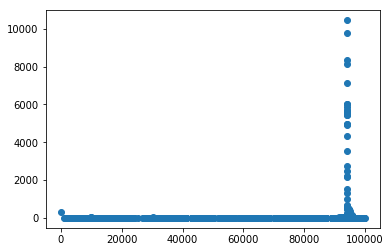

In [167]:
plt.scatter(zipcodes,business_count) 

#### This does show the correct info that most business are located in the zipcodes between 80000 and 100000 however the graph leaves much to be desired in terms of looks

#### And that is because it is considering all businesses, We are interested in an overview, hence zip codes having a business count of 1 or 10 compared to 10000 are pretty much irrelevant for now. Let's limit the graph to show zip codes with only 1000 businesses and above

#### The list business_count is already loaded in the reverse order, we just need to select the top n to get business above 1000

In [232]:
new_bc = business_count[:27]

In [234]:
new_bc

[10455,
 9755,
 8355,
 8138,
 7145,
 6028,
 6013,
 5890,
 5683,
 5661,
 5614,
 5568,
 5542,
 5464,
 5454,
 4989,
 4977,
 4919,
 4343,
 3544,
 2759,
 2473,
 2209,
 2167,
 1508,
 1330,
 1022]

In [235]:
new_zip = zipcodes[:27]

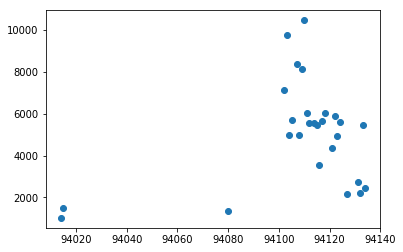

In [237]:
plt.scatter(new_zip,new_bc) #This looks way better

In [238]:
#Adding legends

Text(0.5,1,'zipcode vs number of businesses')

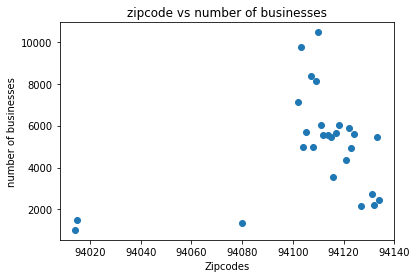

In [240]:
plt.scatter(new_zip,new_bc)

xlab = 'Zipcodes'
ylab = 'number of businesses'
title = 'zipcode vs number of businesses'
plt.xlabel(xlab)
plt.ylabel(ylab)


plt.title(title)

#### Great, We see that majority of the active businesses are located in pockets between zipcodes 94100 and 94120. There are some at 94140 as well, Very few are are at 94020, the rest are practically empty or might be having businesses below 1000

#### Tackling question 2: To promote growth in less popular industries in San Francisco, the county is offering a tax break for new businesses in these categories to encourage them set up shop in SanFrancisco. Identify the NAICS code and description of businesses that would benefit from this scheme.

#### This is a 2 fold insight. First is finding industries or businesses that are less popular. Second is finding out new businesses. 

#### The second is a simple opearation. From present date that is today find how old the Business start date was

#### The first is determining the value_counts of either the DBA type or ownership type to figure out less popular businesses. 

#### We will find out the less popular DBAs first

In [245]:
active_df["DBA Name"].value_counts()[:75]
#Uber, Transport are the popular ones. Salons, Parkings, Universities etc; are relatively les popular.  
#Let's look at the ownership type

San Francisco                        1137
Uber                                 1126
Breather                              335
Lyft                                  259
Uber Driver                           209
Tnc                                   146
Dba                                   140
Abm Security Services Inc             103
Abm Onsite Services-West Inc           94
Tnc Driver                             80
Sf                                     78
Abm Parking Services                   65
City Park                              65
Lyft Driver                            56
Cellco Partnership                     53
Uber/lyft                              53
Sutter Pacific Medical Foundation      52
Ampco System Parking Inc               47
Uber Partner                           46
Academy Of Art University              45
Dewolf Realty Co                       43
N/a                                    39
Cbre Inc                               38
Driver                            

In [248]:
active_df["Ownership Name"].value_counts()[:100]

Breather Products Us Inc              336
Abm Industries Inc                    281
Uber                                  188
Volume Services Inc                   162
Imperial Parking (Us) Llc             125
Tightrope Interactive Inc             112
Griffin Dan G                         100
Sol Rouge Llc                          97
Starbucks Corporation                  89
San Francisco Parking Inc              84
Bon Appetit Management Co              80
Tides Center                           78
Castellucci Antonio                    74
Walgreen Co                            74
Abm Onsite Services-West Inc           69
Cellco Partnership                     65
Ishaan Lillian                         64
Compass Group Usa Inc                  64
Ace Parking Management Inc             58
Sutter West Bay Medical Foundation     54
Connolly James                         52
Del Camp Investments Inc               50
Yerba Buena Beverage Llc               49
Sutter West Bay Hospitals         

#### We will take all businesses with counts below 100 as less popular ones. Will be using the ownership column. And then try and segregate them into a broader columns if necessary.

In [257]:
number_of_businesses = active_df["Ownership Name"].value_counts().tolist()

In [258]:
name_of_businesses = active_df["Ownership Name"].value_counts().index.tolist()

In [259]:
len(name_of_businesses)

127507

In [261]:
len(number_of_businesses) # We are good to go

127507

In [269]:
dictionary = dict(zip(name_of_businesses,number_of_businesses))

In [270]:
dictionary

{'Breather Products Us Inc': 336,
 'Abm Industries Inc': 281,
 'Uber': 188,
 'Volume Services Inc': 162,
 'Imperial Parking (Us) Llc': 125,
 'Tightrope Interactive Inc': 112,
 'Griffin Dan G': 100,
 'Sol Rouge Llc': 97,
 'Starbucks Corporation': 89,
 'San Francisco Parking Inc': 84,
 'Bon Appetit Management Co': 80,
 'Tides Center': 78,
 'Castellucci Antonio': 74,
 'Walgreen Co': 74,
 'Abm Onsite Services-West Inc': 69,
 'Cellco Partnership': 65,
 'Ishaan Lillian': 64,
 'Compass Group Usa Inc': 64,
 'Ace Parking Management Inc': 58,
 'Sutter West Bay Medical Foundation': 54,
 'Connolly James': 52,
 'Del Camp Investments Inc': 50,
 'Yerba Buena Beverage Llc': 49,
 'Sutter West Bay Hospitals': 49,
 'Sp Plus Corporation': 49,
 'Guide Publishing Group Inc': 48,
 'Luxe Valet Inc': 47,
 'Talk Free Inc': 46,
 'Chevron Texaco Corp': 46,
 'Stephens Institute Inc': 45,
 'Pacific Bell Telephone Company': 44,
 'Dewolf Realty Co': 43,
 'Lyft': 41,
 'Tcgsf Inc': 40,
 'California Parking Company': 40

In [275]:
new_dict = {k: v for k, v in dictionary.items() if v < 101}

In [276]:
new_dict

{'Griffin Dan G': 100,
 'Sol Rouge Llc': 97,
 'Starbucks Corporation': 89,
 'San Francisco Parking Inc': 84,
 'Bon Appetit Management Co': 80,
 'Tides Center': 78,
 'Castellucci Antonio': 74,
 'Walgreen Co': 74,
 'Abm Onsite Services-West Inc': 69,
 'Cellco Partnership': 65,
 'Ishaan Lillian': 64,
 'Compass Group Usa Inc': 64,
 'Ace Parking Management Inc': 58,
 'Sutter West Bay Medical Foundation': 54,
 'Connolly James': 52,
 'Del Camp Investments Inc': 50,
 'Yerba Buena Beverage Llc': 49,
 'Sutter West Bay Hospitals': 49,
 'Sp Plus Corporation': 49,
 'Guide Publishing Group Inc': 48,
 'Luxe Valet Inc': 47,
 'Talk Free Inc': 46,
 'Chevron Texaco Corp': 46,
 'Stephens Institute Inc': 45,
 'Pacific Bell Telephone Company': 44,
 'Dewolf Realty Co': 43,
 'Lyft': 41,
 'Tcgsf Inc': 40,
 'California Parking Company': 40,
 'Cbre Inc': 39,
 'Propark America West Llc': 37,
 'E Service Inc': 37,
 'Healthright 360': 36,
 'Uber Driver': 36,
 "Peet's Coffee & Tea Inc": 34,
 'Mile Hi Valet Svc Inc':

In [300]:
not_so_popular_businesses = [x[0] for x in new_dict.items()]

In [301]:
not_so_popular_businesses

['Griffin Dan G',
 'Sol Rouge Llc',
 'Starbucks Corporation',
 'San Francisco Parking Inc',
 'Bon Appetit Management Co',
 'Tides Center',
 'Castellucci Antonio',
 'Walgreen Co',
 'Abm Onsite Services-West Inc',
 'Cellco Partnership',
 'Ishaan Lillian',
 'Compass Group Usa Inc',
 'Ace Parking Management Inc',
 'Sutter West Bay Medical Foundation',
 'Connolly James',
 'Del Camp Investments Inc',
 'Yerba Buena Beverage Llc',
 'Sutter West Bay Hospitals',
 'Sp Plus Corporation',
 'Guide Publishing Group Inc',
 'Luxe Valet Inc',
 'Talk Free Inc',
 'Chevron Texaco Corp',
 'Stephens Institute Inc',
 'Pacific Bell Telephone Company',
 'Dewolf Realty Co',
 'Lyft',
 'Tcgsf Inc',
 'California Parking Company',
 'Cbre Inc',
 'Propark America West Llc',
 'E Service Inc',
 'Healthright 360',
 'Uber Driver',
 "Peet's Coffee & Tea Inc",
 'Mile Hi Valet Svc Inc',
 'Shoham Inc',
 'Fiore Richard A',
 'Parkmerced Owner Llc',
 'Wolfson Suzanne L',
 'Boschetti Paul',
 'At&t Services Inc',
 'Verizon Busines

In [302]:
non_popular_businesses_df = active_df[active_df['Ownership Name'].isin(not_so_popular_businesses)]

In [303]:
len(not_so_popular_businesses)

127501

In [304]:
non_popular_businesses_df.head(3)

,Location Id,Business Account Number,Ownership Name,DBA Name,Street Address,City,State,Source Zipcode,Business Start Date,Location Start Date,...,NAICS Code Description,Parking Tax,Transient Occupancy Tax,LIC Code,LIC Code Description,Supervisor District,Neighborhoods - Analysis Boundaries,Business Corridor,Business Location,Street
0,0026883-11-001,26883,Chevron Texaco Corp,Chevron,2998 San Jose Av,San Francisco,CA,94112.0,10/1/1968,1/31/1977,...,NaN,False,False,NaN,NaN,11.0,Oceanview/Merced/Ingleside,NaN,"2998 SAN JOSE AV\rSan Francisco, CA 94112\r(37...",64555
1,0026883-12-001,26883,Chevron Texaco Corp,Chevron,301 Claremont Blvd,San Francisco,CA,94127.0,10/1/1968,1/31/1977,...,NaN,False,False,NaN,NaN,7.0,West of Twin Peaks,NaN,"301 CLAREMONT BLVD\rSan Francisco, CA 94127\r(...",65613
2,0026883-13-001,26883,Chevron Texaco Corp,Chevron,3675 Geary Blvd,San Francisco,CA,94118.0,10/1/1968,1/31/1977,...,NaN,False,False,NaN,NaN,1.0,Lone Mountain/USF,NaN,"3675 GEARY BLVD\rSan Francisco, CA 94118\r(37....",77337


In [305]:
#Finding their NAICS code

In [306]:
non_popular_businesses_df["NAICS Code Description"]

0                                                      NaN
1                                                      NaN
2                                                      NaN
3                                                      NaN
4                                                      NaN
5                                                      NaN
6                                                      NaN
7                                                      NaN
8                                                      NaN
9                                                      NaN
10                                                     NaN
11                                                     NaN
12                                                     NaN
13                                                     NaN
14                                                     NaN
15                                                     NaN
17                                            Constructi

#### There are however lot of NaNs. Removing all NaNs can be counter productive as some rows may have NAICS code but no description and vice versa. Keeping the ones with Description as just the codes don't gove insight to the what the non popular businesses cater to industrially.

In [307]:
non_popular_businesses_df.isnull().sum()

Location Id                                 0
Business Account Number                     0
Ownership Name                              0
DBA Name                                    0
Street Address                              2
City                                      208
State                                     553
Source Zipcode                             58
Business Start Date                         0
Location Start Date                         0
Location End Date                      155325
Mail Address                                1
Mail City                                  38
Mail Zipcode                               99
Mail State                                 86
NAICS Code                              53817
NAICS Code Description                  56279
Parking Tax                                 0
Transient Occupancy Tax                     0
LIC Code                               161949
LIC Code Description                   161949
Supervisor District               

In [308]:
non_popular_businesses_df["NAICS Code Description"].isnull().sum()

56279

In [310]:
NAICS_desc = non_popular_businesses_df["NAICS Code Description"].dropna().tolist()

In [313]:
set(NAICS_desc) #Unique industries

{'Accommodations ',
 'Administrative and Support Services',
 'Arts, Entertainment, and Recreation',
 'Certain Services',
 'Construction',
 'Financial Services',
 'Food Services',
 'Information',
 'Insurance',
 'Manufacturing',
 'Private Education and Health Services',
 'Professional, Scientific, and Technical Services',
 'Real Estate and Rental and Leasing Services',
 'Retail Trade',
 'Transportation and Warehousing',
 'Utilities',
 'Wholesale Trade'}

#### Now tackling new businesses. using pd.to_Datetime of the business start date minus present date we create a new column called days. Take values of days which are lesser than maybe 1000 (3 years)

In [322]:
active_df["Business Start Date"] = pd.to_datetime(df['Business Start Date'])

In [323]:
active_df["Today"] = pd.to_datetime('today')

In [324]:
active_df["days"] = (active_df["Today"] - active_df["Business Start Date"]).dt.days

In [325]:
active_df.head(2)

,Location Id,Business Account Number,Ownership Name,DBA Name,Street Address,City,State,Source Zipcode,Business Start Date,Location Start Date,...,Transient Occupancy Tax,LIC Code,LIC Code Description,Supervisor District,Neighborhoods - Analysis Boundaries,Business Corridor,Business Location,Street,Today,days
0,0026883-11-001,26883,Chevron Texaco Corp,Chevron,2998 San Jose Av,San Francisco,CA,94112.0,1968-10-01,1/31/1977,...,False,NaN,NaN,11.0,Oceanview/Merced/Ingleside,NaN,"2998 SAN JOSE AV\rSan Francisco, CA 94112\r(37...",64555,2018-11-06 02:22:25.999424,18298
1,0026883-12-001,26883,Chevron Texaco Corp,Chevron,301 Claremont Blvd,San Francisco,CA,94127.0,1968-10-01,1/31/1977,...,False,NaN,NaN,7.0,West of Twin Peaks,NaN,"301 CLAREMONT BLVD\rSan Francisco, CA 94127\r(...",65613,2018-11-06 02:22:25.999424,18298


In [329]:
new_companies = active_df[active_df["days"]<1000]

In [330]:
new_companies.shape

(27436, 28)

In [331]:
#Over 27000 companies are under 1000 days

#### Their NAICS desc are:

In [333]:
NAICS_desc_of_new_comps = new_companies["NAICS Code Description"]


In [334]:
NAICS_desc_of_new_comps = new_companies["NAICS Code Description"].dropna().tolist()

In [335]:
set(NAICS_desc_of_new_comps)

{'Accommodations ',
 'Administrative and Support Services',
 'Arts, Entertainment, and Recreation',
 'Certain Services',
 'Construction',
 'Financial Services',
 'Food Services',
 'Information',
 'Insurance',
 'Manufacturing',
 'Private Education and Health Services',
 'Professional, Scientific, and Technical Services',
 'Real Estate and Rental and Leasing Services',
 'Retail Trade',
 'Transportation and Warehousing',
 'Utilities',
 'Wholesale Trade'}

#### The above list are the sectors in which the new companies have ventured into over the last 3 years.

#### Tackling question 3 What are the different industry types that have emerged in San Francisco over the years. Are there any trends you can identify?

#### Very similar to how we solved the industry sectors which have emerged over the last 3 years

#### Over the last 3 years these were the industries that cropped up.

In [336]:
three_yrs = set(NAICS_desc_of_new_comps)

In [337]:
three_yrs

{'Accommodations ',
 'Administrative and Support Services',
 'Arts, Entertainment, and Recreation',
 'Certain Services',
 'Construction',
 'Financial Services',
 'Food Services',
 'Information',
 'Insurance',
 'Manufacturing',
 'Private Education and Health Services',
 'Professional, Scientific, and Technical Services',
 'Real Estate and Rental and Leasing Services',
 'Retail Trade',
 'Transportation and Warehousing',
 'Utilities',
 'Wholesale Trade'}

#### For various years we can just write a function

In [341]:
def trends_over_years(n):
    days = n*365
    new_companies = active_df[active_df["days"]<days]
    NAICS_desc_of_new_comps = new_companies["NAICS Code Description"].dropna().tolist()
    return set(NAICS_desc_of_new_comps)

In [342]:
trends_over_years(3)

{'Accommodations ',
 'Administrative and Support Services',
 'Arts, Entertainment, and Recreation',
 'Certain Services',
 'Construction',
 'Financial Services',
 'Food Services',
 'Information',
 'Insurance',
 'Manufacturing',
 'Private Education and Health Services',
 'Professional, Scientific, and Technical Services',
 'Real Estate and Rental and Leasing Services',
 'Retail Trade',
 'Transportation and Warehousing',
 'Utilities',
 'Wholesale Trade'}

In [353]:
trends_over_years(1) #Most recent: 1 year

{'Accommodations ',
 'Certain Services',
 'Private Education and Health Services',
 'Professional, Scientific, and Technical Services'}

#### In the last one year, industries have ventured into Accommodations,Certain Services, Private Education and Health Services,Professional, Scientific, and Technical Services

But we see that from years 2 to 100 the industry list remains the same.

In [355]:
trends_over_years(2)

{'Accommodations ',
 'Administrative and Support Services',
 'Arts, Entertainment, and Recreation',
 'Certain Services',
 'Construction',
 'Financial Services',
 'Food Services',
 'Information',
 'Insurance',
 'Manufacturing',
 'Private Education and Health Services',
 'Professional, Scientific, and Technical Services',
 'Real Estate and Rental and Leasing Services',
 'Retail Trade',
 'Transportation and Warehousing',
 'Utilities',
 'Wholesale Trade'}

In [356]:
trends_over_years(3)

{'Accommodations ',
 'Administrative and Support Services',
 'Arts, Entertainment, and Recreation',
 'Certain Services',
 'Construction',
 'Financial Services',
 'Food Services',
 'Information',
 'Insurance',
 'Manufacturing',
 'Private Education and Health Services',
 'Professional, Scientific, and Technical Services',
 'Real Estate and Rental and Leasing Services',
 'Retail Trade',
 'Transportation and Warehousing',
 'Utilities',
 'Wholesale Trade'}

In [357]:
trends_over_years(9)

{'Accommodations ',
 'Administrative and Support Services',
 'Arts, Entertainment, and Recreation',
 'Certain Services',
 'Construction',
 'Financial Services',
 'Food Services',
 'Information',
 'Insurance',
 'Manufacturing',
 'Private Education and Health Services',
 'Professional, Scientific, and Technical Services',
 'Real Estate and Rental and Leasing Services',
 'Retail Trade',
 'Transportation and Warehousing',
 'Utilities',
 'Wholesale Trade'}

#### which means we might have to segregate the data as to how many were added in each sector

In [367]:
def trends_over_years(n):
    days = n*365
    new_companies = active_df[active_df["days"]<days]
    NAICS_desc_of_new_comps = new_companies["NAICS Code Description"].value_counts()
    return NAICS_desc_of_new_comps

In [373]:
trends_over_years(1)

Accommodations                                      3
Professional, Scientific, and Technical Services    1
Private Education and Health Services               1
Certain Services                                    1
Name: NAICS Code Description, dtype: int64

In [374]:
trends_over_years(2)

Transportation and Warehousing                      1160
Construction                                         917
Professional, Scientific, and Technical Services     819
Retail Trade                                         504
Food Services                                        503
Accommodations                                       484
Real Estate and Rental and Leasing Services          400
Arts, Entertainment, and Recreation                  341
Private Education and Health Services                302
Administrative and Support Services                  250
Information                                          152
Wholesale Trade                                      123
Certain Services                                     122
Financial Services                                   103
Manufacturing                                         90
Insurance                                             20
Utilities                                             14
Name: NAICS Code Description, d

In [375]:
trends_over_years(3)

Transportation and Warehousing                      14214
Professional, Scientific, and Technical Services     2401
Construction                                         2274
Accommodations                                       1378
Retail Trade                                         1344
Real Estate and Rental and Leasing Services          1328
Food Services                                        1289
Arts, Entertainment, and Recreation                   909
Private Education and Health Services                 771
Administrative and Support Services                   573
Information                                           477
Financial Services                                    365
Wholesale Trade                                       355
Certain Services                                      269
Manufacturing                                         268
Insurance                                              73
Utilities                                              66
Name: NAICS Co

In [376]:
trends_over_years(4)

Transportation and Warehousing                      17054
Professional, Scientific, and Technical Services     3663
Construction                                         3060
Real Estate and Rental and Leasing Services          2417
Accommodations                                       2184
Food Services                                        1994
Retail Trade                                         1983
Arts, Entertainment, and Recreation                  1336
Private Education and Health Services                1160
Administrative and Support Services                   750
Information                                           750
Financial Services                                    590
Wholesale Trade                                       527
Manufacturing                                         405
Certain Services                                      314
Insurance                                              99
Utilities                                              88
Name: NAICS Co

In [377]:
trends_over_years(5)

Transportation and Warehousing                      18079
Real Estate and Rental and Leasing Services          5330
Professional, Scientific, and Technical Services     4911
Construction                                         3828
Food Services                                        2626
Retail Trade                                         2502
Accommodations                                       2368
Arts, Entertainment, and Recreation                  1722
Private Education and Health Services                1540
Information                                          1039
Administrative and Support Services                   902
Financial Services                                    840
Wholesale Trade                                       726
Manufacturing                                         523
Certain Services                                      359
Insurance                                             144
Utilities                                             114
Name: NAICS Co

#### Over the past 5 years, these are the points the trends make:

#### 1) Most industries venture into Transportation and Warehousing, being one of the most popular business, 
#### 2) Followed by Real estate. 
#### 3) The jump in Transportation has been exponential from 1160 a year back to over 18000 in 5 years, going backwards, however the other ventures do not reflect this metoeric jump. 
#### 4) Insurance and Utillities have remained more or less the same over the years.
#### 5) Professional, Scientific, and Technical Services took a sudden rise 2 years back, overtaking construction and real estate. 
